1. Load Data

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv("rmp_all_schools_reviews_small.csv")

df.head()

,clarityRating,class,comment,date,difficultyRating,legacyId,ratingTags,profId
0,1,Math32A,This was the absolute worst math class of my l...,2026-02-10 04:20:05 +0000 UTC,5,42598787,Tough grader--Test heavy,3145448
1,1,Math32A,If I can save you from the torture of a lifeti...,2026-02-10 01:35:28 +0000 UTC,5,42598200,Tough grader,3145448
2,1,Math32A,Get ready for the biggest GPA tank of ur life....,2026-02-02 03:51:34 +0000 UTC,5,42573402,Tough grader--Test heavy--Graded by few things,3145448
3,1,Math32A,3 midterms with 20% each and a final worth 40%...,2026-01-28 04:24:59 +0000 UTC,4,42557851,Tough grader--Test heavy--Graded by few things,3145448
4,1,Math32A,His a good person since he is willing to help ...,2026-01-28 04:22:44 +0000 UTC,5,42557841,Tough grader--Test heavy,3145448


2. Professor-Data Summary

In [62]:
prof_summary = (df.groupby("profId").agg(reviews=("clarityRating", "count"), avg_clarity=("clarityRating", "mean"), avg_diff=("difficultyRating", "mean"), clarity_var=("clarityRating", "var")).reset_index())
prof_summary.head()


,profId,reviews,avg_clarity,avg_diff,clarity_var
0,288,36,4.694444,2.694444,0.275397
1,628,76,2.855263,3.421053,2.338772
2,722,25,3.400000,3.440000,2.000000
3,814,10,4.800000,3.900000,0.177778
4,854,63,2.809524,2.365079,2.156682


In [46]:
global_mean = df["clarityRating"].mean()

#strength
lambda_ = 20
prof_summary["shrunk_clarity"] = ((prof_summary["reviews"] / (prof_summary["reviews"] + lambda_)) * prof_summary["avg_clarity"] + (lambda_ / (prof_summary["reviews"] + lambda_)) * global_mean)
prof_summary.head()

,profId,reviews,avg_clarity,avg_diff,clarity_var,shrunk_clarity
0,288,36,4.694444,2.694444,0.275397,4.297409
1,628,76,2.855263,3.421053,2.338772,3.006822
2,722,25,3.400000,3.440000,2.000000,3.481220
3,814,10,4.800000,3.900000,0.177778,3.988496
4,854,63,2.809524,2.365079,2.156682,2.995842


4. Data Visualization

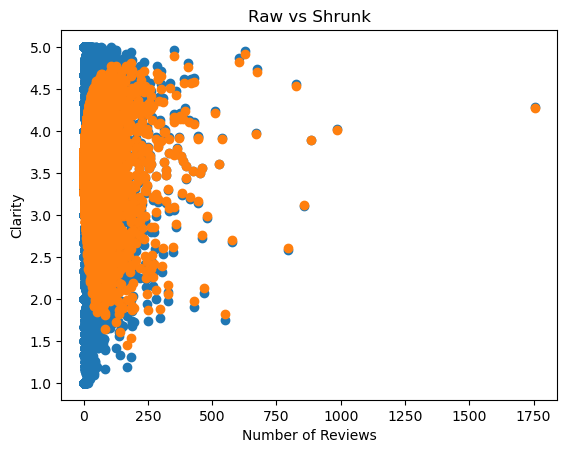

In [52]:
plt.figure()
plt.scatter(prof_summary["reviews"], prof_summary["avg_clarity"])
plt.scatter(prof_summary["reviews"], prof_summary["shrunk_clarity"])
plt.xlabel("Number of Reviews")
plt.ylabel("Clarity")
plt.title("Raw vs Shrunk")
plt.show()

5. Regression

In [54]:
X = df[["difficultyRating"]]
y = df["clarityRating"]

model = LinearRegression()
model.fit(X, y)

B_0 = model.intercept_
B_1 = model.coef_[0]

B_0, B_1

(np.float64(5.318752860672287), np.float64(-0.5586107402042814))

In [64]:
df["pred_clarity"] = model.predict(X)
df["resid_clarity"] = df["clarityRating"] - df["pred_clarity"]
residual_summary = (df.groupby("profId").agg(adj_clarity=("resid_clarity", "mean")).reset_index())

prof_summary = prof_summary.merge(residual_summary, on="profId")
prof_summary.head()

,profId,reviews,avg_clarity,avg_diff,clarity_var,adj_clarity
0,288,36,4.694444,2.694444,0.275397,0.880837
1,628,76,2.855263,3.421053,2.338772,-0.552453
2,722,25,3.400000,3.440000,2.000000,0.002868
3,814,10,4.800000,3.900000,0.177778,1.659829
4,854,63,2.809524,2.365079,2.156682,-1.188070
